## 1. Loading the Data:

In [1]:
# import libraries that will be used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read csv file
df = pd.read_csv(r"C:\Users\adiya\Documents\Uni\Data Science\1SA-Final-Project\AB_US_2020.csv", low_memory=False)

## 2. Understanding the Data:

In [3]:
# display the first 5 rows for a quick look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57864,-82.59578,Entire home/apt,90,1,267,22/09/20,2.39,5,0,Asheville
4,160594,Historic Grove Park,769252,Elizabeth,NaN,28801,35.61442,-82.54127,Private room,125,30,58,19/10/15,0.52,1,0,Asheville


In [4]:
# check the shape of the DataFrame (rows, columns)
# understand the amount of data
df.shape

(226030, 17)

In [5]:
# description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226030 entries, 0 to 226029
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              226030 non-null  int64  
 1   name                            226002 non-null  object 
 2   host_id                         226030 non-null  int64  
 3   host_name                       225997 non-null  object 
 4   neighbourhood_group             110185 non-null  object 
 5   neighbourhood                   226030 non-null  object 
 6   latitude                        226030 non-null  float64
 7   longitude                       226030 non-null  float64
 8   room_type                       226030 non-null  object 
 9   price                           226030 non-null  int64  
 10  minimum_nights                  226030 non-null  int64  
 11  number_of_reviews               226030 non-null  int64  
 12  last_review     

In a first observation it is clear some features (for example "neighbourhood_group",
"last_review", and "reviews_per_month") consist of many null values.

### Features in the DataFrame:
0. id: unique id number for each listing
1. name: name of listing
2. host_id: unique host id number
3. host_name: name of host
4. neighbourhood_group: group in which the neighbourhood lies
5. neighbourhood: zip code
6. latitude: latitude of listing
7. longitude: longitude of listing
8. room_type: room type (Entire home/apt, Private room, etc.)
9. price: price of listing per night
10. minimum_nights: minimum number of nights required to book
11. number_of_reviews: total number of reviews on listing
12. last_review: date of last review
13. reviews_per_month: average reviews per month
14. calculated_host_listings_count: total number of listing by host
15. availability_365: number of days a year the listing is available for rent
16. city: region of the listing

## 3. Cleaning the Data:

In [6]:
# further examination of null values
# the methods below calculate the number of missing values in each feature
df.isnull().sum()

id                                     0
name                                  28
host_id                                0
host_name                             33
neighbourhood_group               115845
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        48602
reviews_per_month                  48602
calculated_host_listings_count         0
availability_365                       0
city                                   0
dtype: int64

##### Understanding the features helps gain insight on how to treat null values.

In [7]:
print("'city' Column Labels: \n", df['city'].unique())
print()
print("'neighbourhood_group' Column Labels: \n", df['neighbourhood_group'].unique())

'city' Column Labels: 
 ['Asheville' 'Austin' 'Boston' 'Broward County' 'Cambridge' 'Chicago'
 'Clark County' 'Columbus' 'Denver' 'Hawaii' 'Jersey City' 'Los Angeles'
 'Nashville' 'New Orleans' 'New York City' 'Oakland' 'Pacific Grove'
 'Portland' 'Rhode Island' 'Salem' 'San Clara Country' 'San Diego'
 'San Francisco' 'San Mateo County' 'Santa Cruz County' 'Seattle'
 'Twin Cities MSA' 'Washington D.C.']

'neighbourhood_group' Column Labels: 
 [nan 'Hawaii' 'Kauai' 'Maui' 'Honolulu' 'Other Cities'
 'City of Los Angeles' 'Unincorporated Areas' 'Manhattan' 'Brooklyn'
 'Queens' 'Staten Island' 'Bronx' 'Providence' 'Washington' 'Newport'
 'Bristol' 'Kent' 'Central Area' 'Other neighborhoods' 'West Seattle'
 'Downtown' 'Ballard' 'Capitol Hill' 'Beacon Hill' 'Seward Park'
 'Queen Anne' 'Rainier Valley' 'Lake City' 'Cascade' 'Delridge'
 'University District' 'Northgate' 'Magnolia' 'Interbay']


The 'city' column (presented above) categorizes the residential area of every listing.
Therefore, given the large amount of missing values and insignificance of the 'neighbourhood_group'
column, I decided to remove it.

In [8]:
# dropping 'neighbourhood_group' column
df.drop(['neighbourhood_group'], axis=1, inplace=True)
# examining the changes
df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,28804,35.65146,-82.62792,Private room,60,1,138,16/02/20,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,28801,35.59779,-82.55540,Entire home/apt,470,1,114,07/09/20,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,75,30,89,30/11/19,0.81,2,298,Asheville


In [9]:
# can also see that the number of columns changed to 16
df.shape

(226030, 16)

The 'reviews_per_month' column provides an average of the reviews. The missing values can be changed
to 0.0, suggesting the listing has a monthly average of 0 reviews.

In [10]:
# replacing null values in 'reviews_per_month' column with 0
df.fillna({'reviews_per_month': 0}, inplace=True)
# examining changes
df['reviews_per_month'].isnull().sum()

0

In [11]:
# validates that if the null value is 0 in the 'reviews per month column',
# then they also appear as null in the 'last_review' column
rpm = df.groupby(by='reviews_per_month')
zero = rpm.get_group(0)
print("Number of null values in 'last_review' column:", zero['last_review'].isnull().sum())
print("Number of listings with zero reviews per month:", len(zero))

Number of null values in 'last_review' column: 48602
Number of listings with zero reviews per month: 48602


The 'last_review' column consists of dates. If there were no reviews for the listing, the date
will not exist. This is also represented as 0.0 in the 'reviews_per_month' column that was
previously changed. Furthermore, there is no indication if the last review was positive or
negative. For all the reasons stated, and the amount of null values show that this column
is unnecessary.

In [12]:
# dropping 'last_review' column
df.drop(['last_review'], axis=1, inplace=True)
# examining the changes
df.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,28804,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,80905,French Chic Loft,427027,Celeste,28801,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,Lisa,28801,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville


In [13]:
# number of columns changed to 15
df.shape

(226030, 15)

In [14]:
# comparing number of unique values
print("Number of unique 'host_id' listings:", df['host_id'].unique().size)
print("Number of unique 'host_name' listings:", df['host_name'].unique().size)
print()
print("Number of unique 'id' listings:", df['id'].unique().size)
print("Overall number of instances:", len(df))

Number of unique 'host_id' listings: 130425
Number of unique 'host_name' listings: 30534

Number of unique 'id' listings: 226029
Overall number of instances: 226030


As shown above, the 'host_id' column provides a unique identification number for each host.
Meanwhile, the 'host_name' column is insubstantial since various hosts could have the same name.
Moreover, the 'id' column is individual for each listing. Both columns are useless for research
and will be removed.

In [15]:
# dropping 'host_name' and 'id' columns
df.drop(['host_name', 'id'], axis=1, inplace=True)
# examining the changes
df.head(3)

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
0,Charming Victorian home - twin beds + breakfast,165529,28804,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville
1,French Chic Loft,427027,28801,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville
2,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,28801,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville


In [16]:
# number of columns changed to 13
df.shape

(226030, 13)

In [17]:
# checking null values left
df.isnull().sum()

name                              28
host_id                            0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
city                               0
dtype: int64

In [18]:
# new DataFrame with the instances that have NaN in the 'name' column
df1 = df[df.isna().any(axis=1)]
df1.head()

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city
23691,NaN,305261435,Pompano Beach,26.28332,-80.10731,Entire home/apt,79,2,16,2.23,2,136,Broward County
81872,NaN,114871749,Pasadena,34.17216,-118.11699,Private room,125,2,0,0.00,1,179,Los Angeles
93004,NaN,141228320,Santa Clarita,34.41328,-118.44301,Private room,40,1,10,0.64,1,129,Los Angeles
119475,NaN,6676776,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0.00,1,362,New York City
120149,NaN,11395220,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,0.37,1,364,New York City


In [19]:
# examining the null values according to cities
df1['city'].value_counts()

New York City        18
Twin Cities MSA       5
Los Angeles           2
Broward County        1
San Clara Country     1
Washington D.C.       1
Name: city, dtype: int64

The 'name' column is irrelevant for research, so it can be changed in order to keep the data.

In [20]:
# replacing null values in 'name' column with 'Unnamed'
df.fillna({'name': 'Unnamed'}, inplace=True)
# examining changes
df['name'].isnull().sum()

0

## 4. Visualization of the Data
##### *The motivation for this section is to gain more insights.*

### Cities According to States:

|Category Number|State|Abbreviation|City (listed in DF)|
|:------:|:------:|:------:|:------:|
|**1**|California    |CA    | Los Angles |
|**1**|California    |CA    | Oakland |
|**1**|California    |CA    | Pacific Grove |
|**1**|California    |CA    | San Clara Country |
|**1**|California    |CA    | San Diego |
|**1**|California    |CA    | San Francisco |
|**1**|California    |CA    | San Mateo County |
|**1**|California    |CA    | Santa Cruz County |
|**2**|Colorado    |CO     | Denver    |
|**3**|District of Columbia   |DC     |Washington D.C.     |
|**4**|Florida    |FL   |Broward County    |
|**5**|Hawaii    |HI     |Hawaii     |
|**6**|Illinois    |IL     |Chicago     |
|**7**|Louisiana    |LA    |New Orleans     |
|**8**|Massachusetts    |MA     |Boston     |
|**8**|Massachusetts    |MA     |Cambridge     |
|**8**|Massachusetts    |MA     |Salem     |
|**9**|Minnesota     |MN     |Twin Cities MSA     |
|**10**|Nevada    |NV    |Clark County     |
|**11**|New Jersey     |NJ     |Jersey City     |
|**12**|New York     |NY     |New York City     |
|**13**|North Carolina     |NC     |Asheville     |
|**14**|Ohio    |OH     |Columbus     |
|**15**|Oregon     |OR     |Portland     |
|**16**|Rhode Island     |RI     |Rhode Island     |
|**17**|Tennessee     |TN     |Nashville     |
|**18**|Texas     |TX     |Austin     |
|**19**|Washington    |WA     |Seattle     |

In [21]:
# deep copy of DataFrame
df2 = df.copy()

In [22]:
# adding state column to DataFrame
state = {
    "Los Angeles": 1,
    "Oakland": 1,
    "Pacific Grove": 1,
    "San Clara Country": 1,
    "San Diego": 1,
    "San Francisco": 1,
    "San Mateo County": 1,
    "Santa Cruz County": 1,

    "Denver": 2,

    "Washington D.C.": 3,

    "Broward County": 4,

    "Hawaii": 5,

    "Chicago": 6,

    "New Orleans": 7,

    "Boston": 8,
    "Cambridge": 8,
    "Salem": 8,

    "Twin Cities MSA": 9,

    "Clark County": 10,

    "Jersey City": 11,

    "New York City": 12,

    "Asheville": 13,

    "Columbus": 14,

    "Portland": 15,

    "Rhode Island": 16,

    "Nashville": 17,

    "Austin": 18,

    "Seattle": 19
}

df2['state'] = df2['city'].map(state)

In [23]:
# making sure state abbreviation was added to every instance
df2['state'].isnull().sum()

0

In [24]:
# examining the changes
df2.head(3)

,name,host_id,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,city,state
0,Charming Victorian home - twin beds + breakfast,165529,28804,35.65146,-82.62792,Private room,60,1,138,1.14,1,0,Asheville,13
1,French Chic Loft,427027,28801,35.59779,-82.55540,Entire home/apt,470,1,114,1.03,11,288,Asheville,13
2,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,28801,35.60670,-82.55563,Entire home/apt,75,30,89,0.81,2,298,Asheville,13


In [25]:
df2['state'].value_counts()

1     65893
12    45756
5     22434
4     10858
18    10436
10     8408
3      7350
19     6575
9      6470
7      6408
6      6397
17     6139
8      4570
15     4281
2      4200
16     3884
11     2488
13     2074
14     1409
Name: state, dtype: int64

The state column presents a new insight. When counting values by cities, it seems that New York has
more listings. By counting values according to states we can notice that most listings are
actually in California.

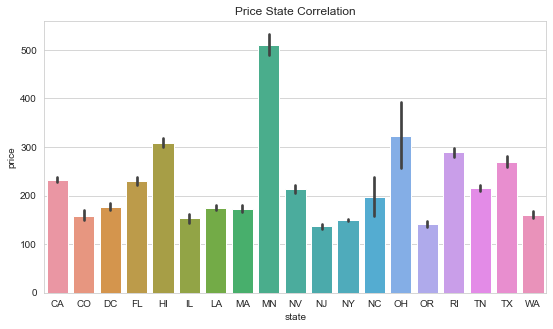

In [27]:
# plot price state correlation
plt.figure(figsize=(9,5))
sns.set_style(style='whitegrid')
sns.barplot(data=df2, x='state', y='price')
plt.title("Price State Correlation")
plt.xticks(ticks=range(0,19),
           labels=['CA', 'CO', 'DC', 'FL', 'HI', 'IL', 'LA', 'MA', 'MN', 'NV',
                   'NJ', 'NY', 'NC', 'OH', 'OR', 'RI', 'TN', 'TX', 'WA']);